# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

# Load File

In [2]:
df=pd.read_csv('filtered_salary.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  object
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary_currency     141566 non-null  object
 5   salary              141566 non-null  int64 
 6   employee_residence  141566 non-null  object
 7   remote_ratio        141566 non-null  int64 
 8   company_location    141566 non-null  object
 9   company_size        141566 non-null  object
dtypes: int64(2), object(8)
memory usage: 10.8+ MB


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2025-01-01,EN,FT,Data Quality Analyst,GBP,75949,GB,0,GB,M
1,2025-01-01,EN,FT,Data Quality Analyst,GBP,60759,GB,0,GB,M
2,2025-01-01,SE,FT,Applied Scientist,USD,266000,US,0,US,M
3,2025-01-01,SE,FT,Applied Scientist,USD,204000,US,0,US,M
4,2025-01-01,SE,FT,Data Scientist,USD,291000,US,0,US,M


# EDA 
` Exploratory Data Analysis`
![eda](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3qJT4nScSFBWZnGk0APd2D-KRGYk6tS5ilg&s)

## Univariate Analysis
Here we will analyze single columns

### 1-> Spread of work years 

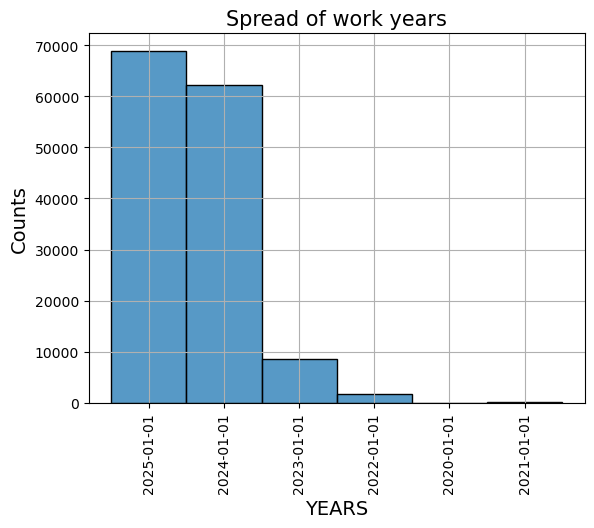

In [39]:
sns.histplot(df.work_year)
plt.title('Spread of work years',fontsize=15,color='black')
plt.xlabel('YEARS',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.xticks(rotation=90)
plt.savefig('images/EDA/work_year.png')
plt.grid()
plt.show()

### 2-> Distribution of experience level

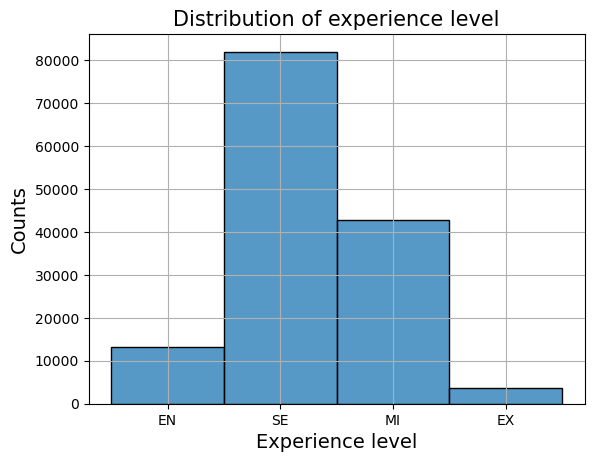

In [38]:
sns.histplot(df.experience_level)
plt.title('Distribution of experience level',fontsize=15,color='black')
plt.xlabel('Experience level',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.savefig('images/EDA/Experience_level.png')
plt.grid()
plt.show()

### 3-> Distribution of Employment type

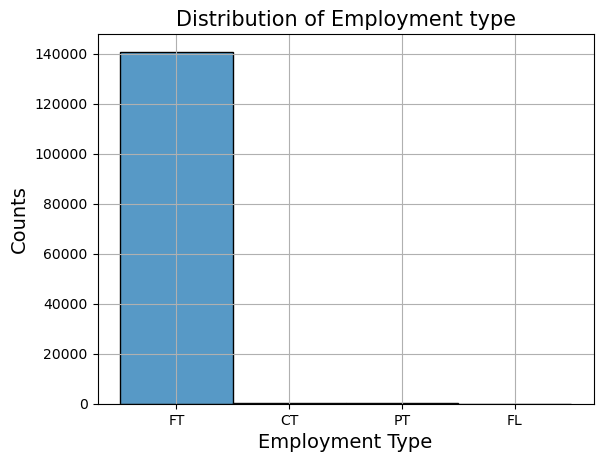

In [37]:
sns.histplot(df.employment_type)
plt.title('Distribution of Employment type',fontsize=15,color='black')
plt.xlabel('Employment Type',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid()
plt.savefig('images/EDA/employment_type.png')
plt.show()

### 4-> Salary Distribution

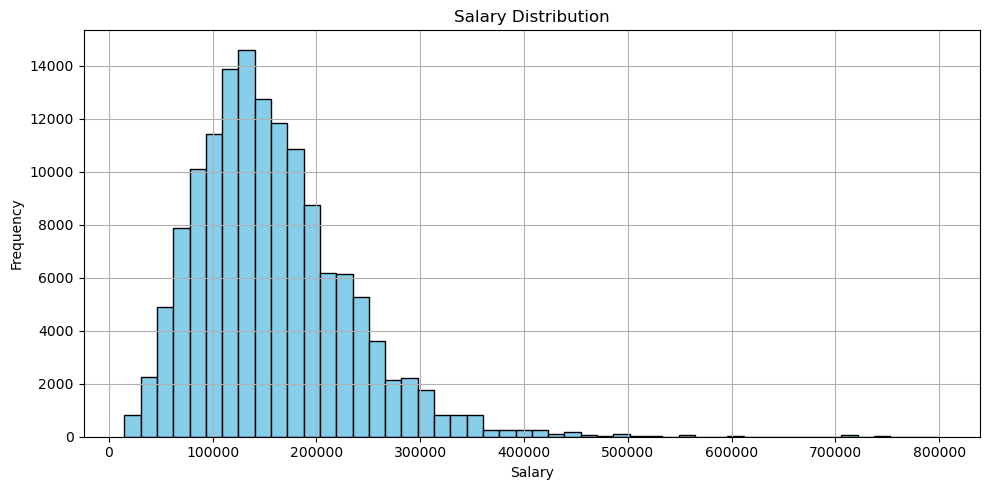

In [36]:
df['salary'].plot.hist(bins=50, color='skyblue', edgecolor='black', figsize=(10,5))
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/EDA/salary.png')
plt.show()

### 5-> Top recurring Jobs upto 70 rows only

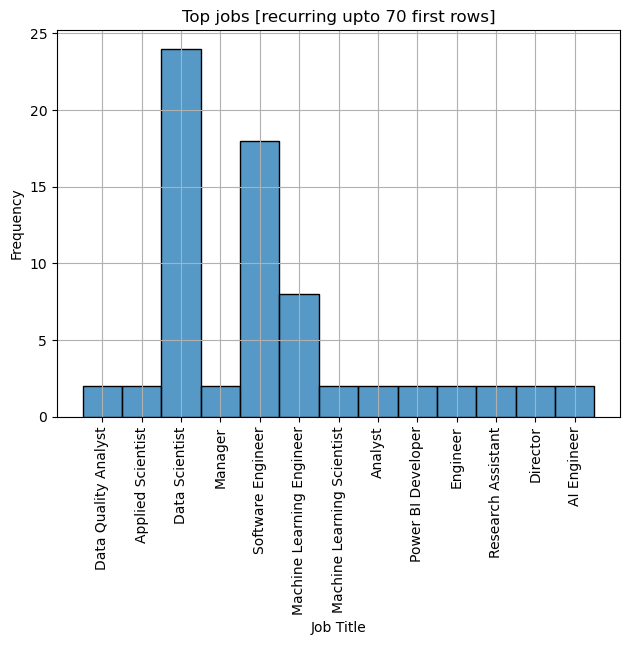

In [40]:
sns.histplot(df.job_title.head(70))
plt.title('Top jobs [recurring upto 70 first rows]')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/EDA/top_jobs_recurring.png')
plt.xticks(rotation=90)
plt.show()

### 6-> Most popular Jobs (Top 20 only)

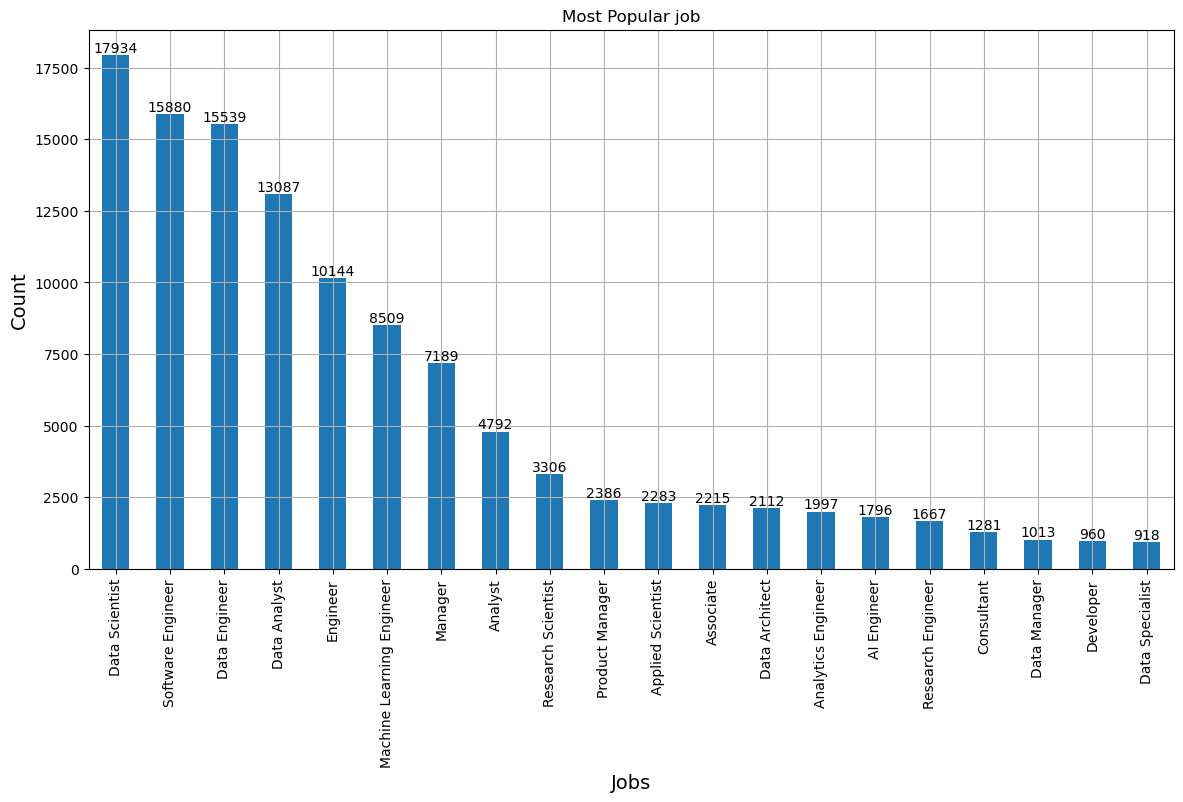

In [41]:
job_topped=df['job_title'].value_counts().nlargest(20)
plt.figure(figsize=(14,7))
job_topped.plot(kind='bar',title='Most Popular job')
for i , values in enumerate(job_topped):
    plt.text(i,values,str(values),ha='center',va='bottom')
plt.xlabel('Jobs',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.grid()
plt.savefig('images/EDA/popular_jobs.png')
plt.show()

### 7-> Most recurring salary currency 

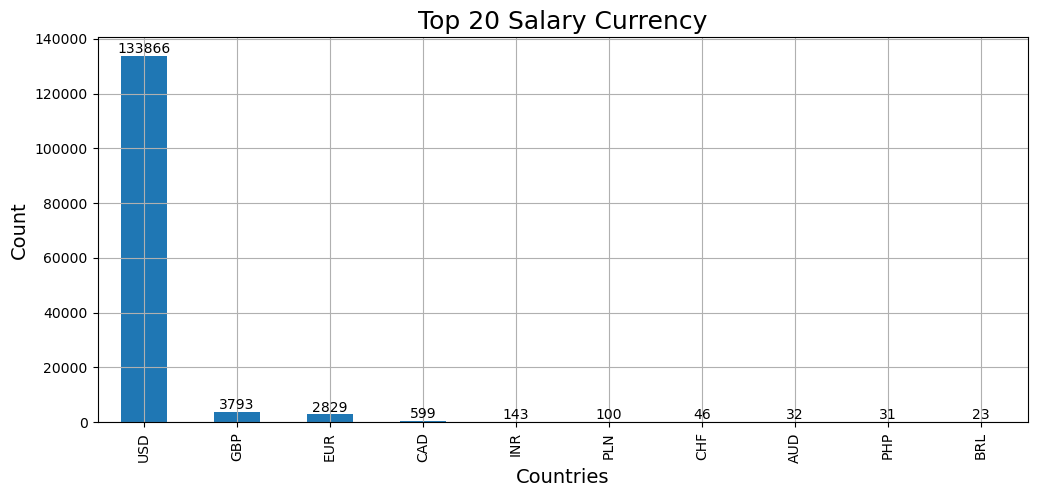

In [42]:
top_countries_salary_currency=df['salary_currency'].value_counts().nlargest(10)
plt.figure(figsize=(12,5))
top_countries_salary_currency.plot(kind='bar')
for i , values in enumerate(top_countries_salary_currency):
    plt.text(i,values,str(values),ha='center',va='bottom')
plt.title('Top 20 Salary Currency',fontsize=18)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.grid()
plt.savefig('images/EDA/salary_currency.png')
plt.show()

### 7-> Distribution of Remote ratio

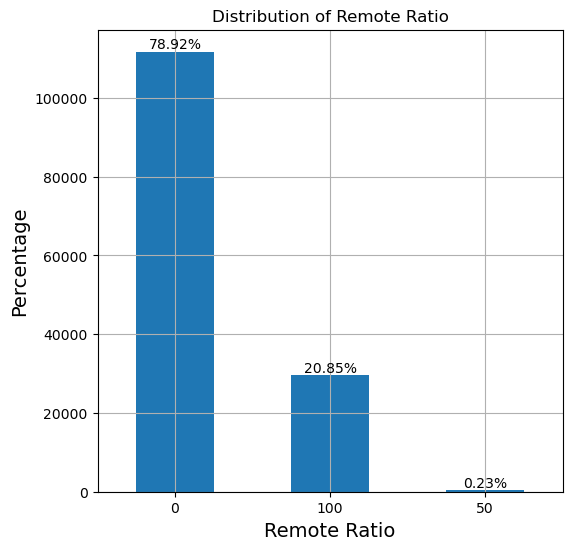

In [43]:
remote_counts = df['remote_ratio'].value_counts()
total= remote_counts.sum()
plt.figure(figsize=(6, 6))
remote_counts.plot(kind='bar')
for i,values in enumerate(remote_counts):
    percent=(values/total)*100
    percent=percent.round(2)
    plt.text(i,values,f'{percent}%',ha='center',va='bottom')
plt.title('Distribution of Remote Ratio')
plt.xticks(rotation=0)
plt.xlabel('Remote Ratio',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.grid()
plt.savefig('images/EDA/remote.png')
plt.show()

### 8-> Distribution of Company size

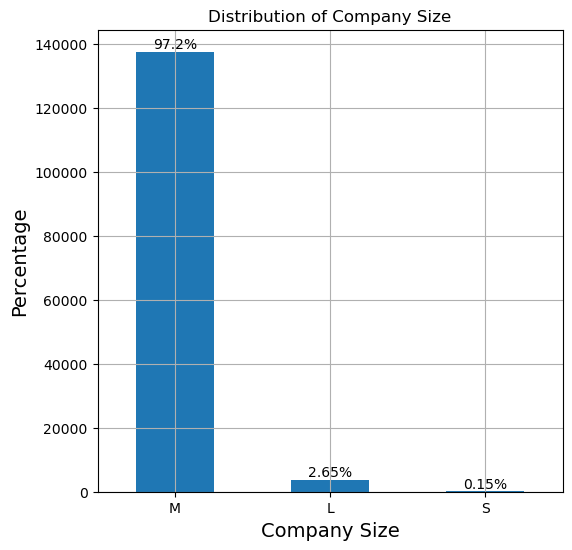

In [44]:
company_size_total = df['company_size'].value_counts()
total=company_size_total.sum()
plt.figure(figsize=(6, 6))
company_size_total.plot(kind='bar')
for i,values in enumerate(company_size_total):
    percent=(values/total)*100
    percent=percent.round(2)
    plt.text(i,values,f'{percent}%',ha='center',va='bottom')
plt.title('Distribution of Company Size')
plt.xticks(rotation=0)
plt.xlabel('Company Size',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.grid()
plt.savefig('images/EDA/company_size.png')
plt.show()

### 9-> Most recurring words in job title

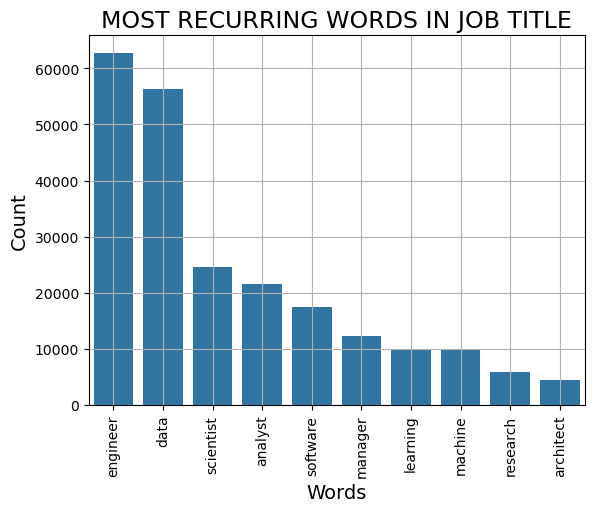

In [45]:
all_words=df['job_title'].str.lower().str.split().explode().value_counts().reset_index()
all_words.columns=['word','count']
sns.barplot(data=all_words.head(10),x='word',y='count')
plt.title('MOST RECURRING WORDS IN JOB TITLE',fontsize=17)
plt.xlabel('Words',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.savefig('images/EDA/Most_recurring_words.png')
plt.show()

## Bivariate/ Multivariate Analysis
Doing EDA of two or multiple columns

### 1-> Distribution of Salary based on the Experience Level and Employment type

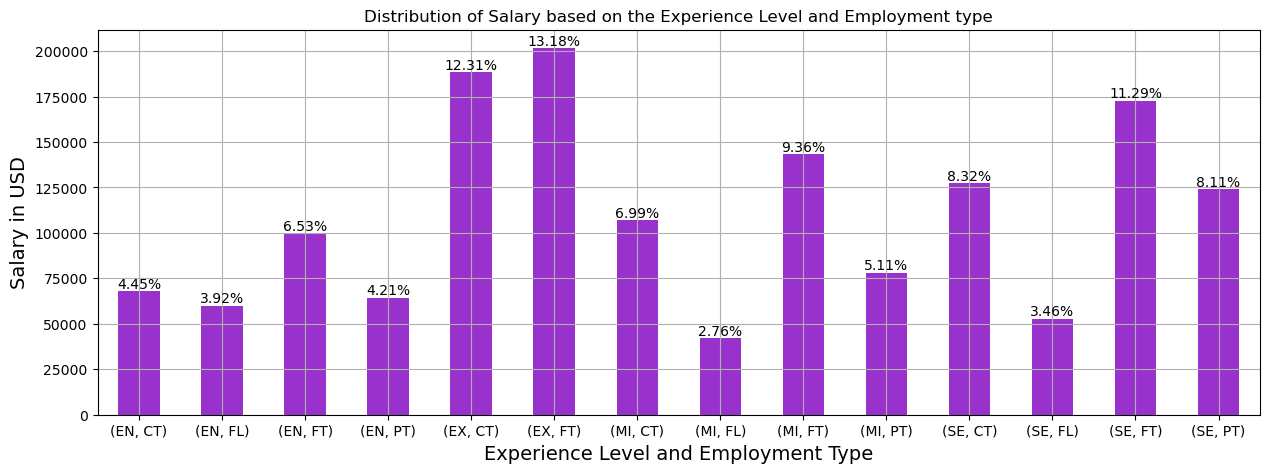

In [46]:
plt.figure(figsize=(15,5))
el_et_s=df.groupby(['experience_level','employment_type'])['salary'].mean()
ax=el_et_s.plot(kind='bar',color='darkorchid')
ax.set_title('Distribution of Salary based on the Experience Level and Employment type')
ax.set_xlabel('Experience Level and Employment Type',fontsize=14,color='black')
ax.set_ylabel('Salary in USD',fontsize=14,color='black')
total=el_et_s.sum()
for i, values in enumerate(el_et_s):
    percent=(values/total)*100
    percent=percent.round(2)
    plt.text(i,values,f'{percent}%',ha='center',va='bottom')
plt.xticks(rotation=0)
plt.grid()
plt.savefig('images/EDA/Exp_Emp_salary.png')
plt.show()

### 2-> Count of Employees by Experience Level and Company Size

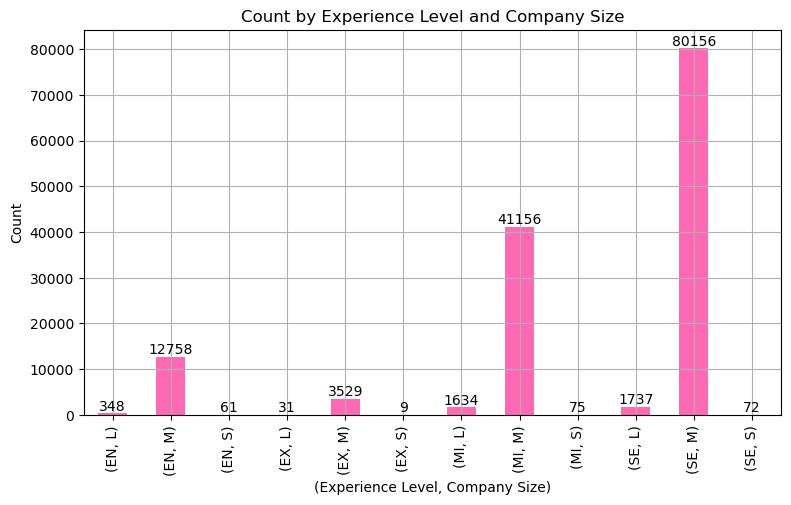

In [47]:
el_el=df.groupby(['experience_level','company_size']).size()
plt.figure(figsize=(9,5))
el_el.plot(kind='bar',color='hotpink')
for i,values in enumerate(el_el):
    plt.text(i,values,str(values),ha='center',va='bottom')
plt.title('Count by Experience Level and Company Size')
plt.xlabel('(Experience Level, Company Size)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid()
plt.savefig('images/EDA/Exp_company.png')
plt.show()

### 3-> Employment Type by Salary[Mean]

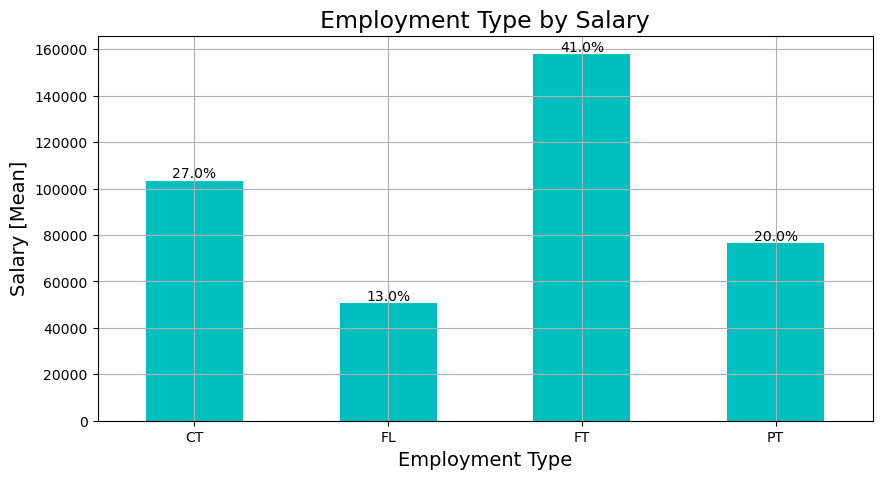

In [51]:
et_s=df.groupby('employment_type')['salary'].mean()
plt.figure(figsize=(10,5))
et_s.plot(kind='bar',color='c')
total=et_s.sum()
for i, values in enumerate(et_s):
    percentage=((values/total)*100).round()
    plt.text(i,values,str(f'{percentage}%'),ha='center',va='bottom')
plt.title('Employment Type by Salary',fontsize=17)
plt.xlabel('Employment Type',fontsize=14)
plt.ylabel('Salary [Mean]',fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.savefig('images/EDA/emp_salary.png')
plt.show()

### 4-> Avg Salary by Company Size

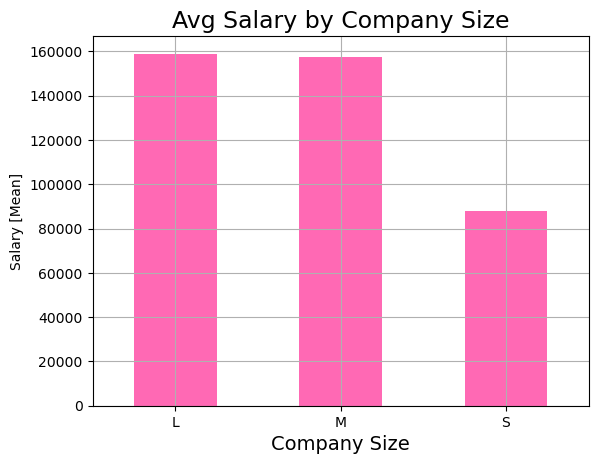

In [50]:
cs_s=df.groupby('company_size')['salary'].mean()
cs_s.plot(kind='bar',color='hotpink')
plt.xlabel('Company Size',fontsize=14)
plt.ylabel('Salary [Mean]')
plt.title('Avg Salary by Company Size',fontsize=17)
plt.xticks(rotation=0)
plt.grid()
plt.savefig('images/EDA/company-size_salary.png')
plt.show()

### 5-> Heatmap

<Axes: >

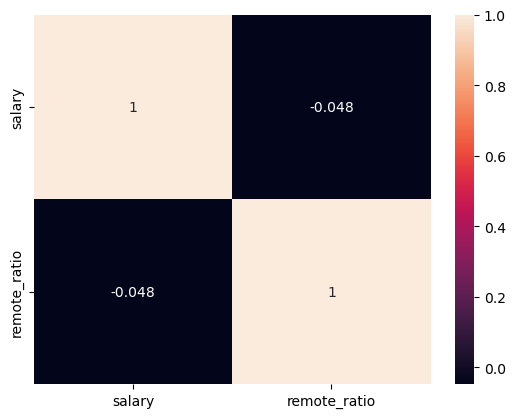

In [31]:
num_corr=df.select_dtypes(include=['number']).columns.tolist()
sns.heatmap(df[num_corr].corr(),annot=True) 